## Exercise 4
1 & 2

Loading dataset and convert score to numeric:

In [144]:
import pandas as pd
from IPython.core.display import display

dishes = pd.read_csv('dishes.csv', sep=';')
dishes.loc[:, "Score"] = pd.to_numeric(dishes["Score"], errors='coerce')
display(dishes.tail())

,UserName,Dish,Score
895,torbjbak,Kentucky Fried Chicken,3
896,torbjbak,Lutefisk,1
897,torbjbak,Coq au vin,3
898,torbjbak,Ratatouille,4
899,torbjbak,Moules frites,4


Finding mean scores:

In [145]:
mean = dishes.groupby(['Dish']).mean()
display(mean)
labels = mean.index.values
values = mean['Score'].values

,Score
Dish,
Bacalao,3.681818
Chicken Curry,4.220000
Chicken Tikka Masala,4.400000
Chili Con Carne,3.820000
Coq au vin,4.000000
Kebab,3.500000
Kentucky Fried Chicken,2.437500
Lutefisk,2.957447
MacDonalds Cheeseburger,2.265306


Displaying mean scores:

Text(0, 0.5, 'Mean score')

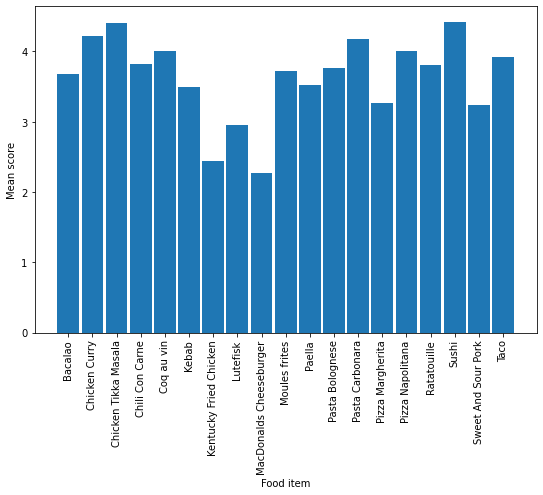

In [146]:
import matplotlib.pyplot as plt

x = range(len(labels))
plt.figure(figsize=(9, 6))
plt.bar(x, values, 0.9)
plt.xticks(x, labels, rotation=90)
plt.xlabel("Food item")
plt.ylabel("Mean score")

Creating a pivot table from the data and filling in NaN values column means

In [147]:
dishes_pivot = dishes.pivot_table(index='UserName', values='Score', columns='Dish')
dishes_pivot = dishes_pivot.fillna(dishes_pivot.mean())

Making a 2D PCA table

In [148]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(dishes_pivot)
dishes_pca = pca.transform(dishes_pivot)

Using the PCA table to create KMeans clusters

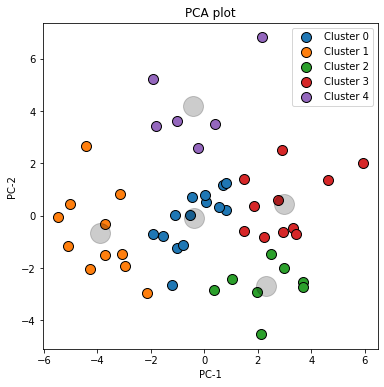

In [149]:
from sklearn.cluster import KMeans
import numpy as np

k = 5

kmeans = KMeans(n_clusters=k).fit(dishes_pca)
y_kmeans = kmeans.predict(dishes_pca)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_title("PCA plot")
ax.set_xlabel("PC-1")
ax.set_ylabel("PC-2")

pc_1 = dishes_pca[:, 0]
pc_2 = dishes_pca[:, 1]

for i in range(k):
    selection = np.where(y_kmeans == i)
    ax.scatter(pc_1[selection], pc_2[selection], s=100, label='Cluster ' + str(i), edgecolor='black')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.2, edgecolor='black')
ax.legend()

KNN, shows the 5 neares neighbours, not including myself

In [166]:
dishes_T = dishes_pivot.T # Swap rows and columns
distance = lambda column1, column2: np.linalg.norm(column1 - column2)
distances = dishes_T.apply(lambda column2: dishes_T.apply(lambda column1: distance(column1, column2)))

me = 'torbjbak'
my_neighbours = distances[me].drop(me, axis=0).sort_values()
display(my_neighbours.head())

UserName
steinvas    4.285162
marrei      4.472136
eddiebo     4.795832
martpett    5.099020
finnks      5.131081
Name: torbjbak, dtype: float64

Visualizing distances with multidimensiopnal scaling

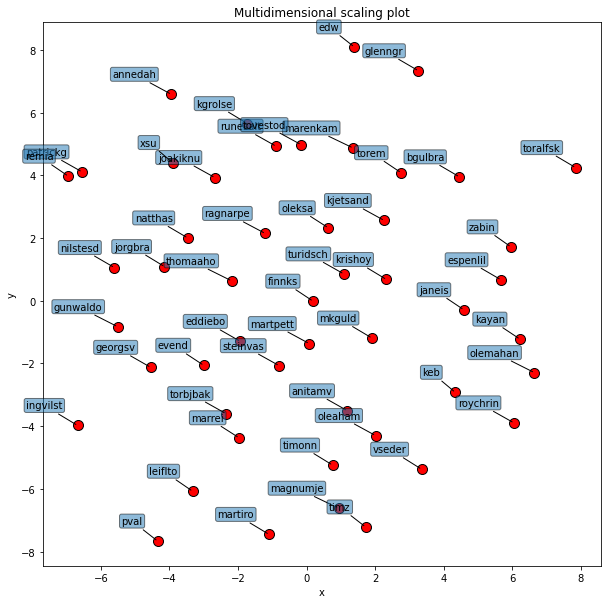

In [179]:
from sklearn import manifold

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=1)
results = mds.fit(distances)
coords = results.embedding_

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title("Multidimensional scaling plot")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(coords[:, 0], coords[:, 1], s=100, color='red', edgecolor='black')

# Plot 'User' labels
for label, x, y in zip(distances.columns.values, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-15, 15),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.2', alpha=0.5),
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0'))

plt.show()

